In [1]:
import pandas as pd 
import numpy as np
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.tree import DecisionTreeRegressor

In [2]:
X = pd.read_csv("all-data.csv").drop("Date", axis=1)

In [3]:
useable_X = X.loc[X["Index"] < len(X)-60]
useable_y = X.loc[X["Index"] > 59]["New Cases"]
predict_X = X.loc[X["Index"] >= len(X) - 60]

In [102]:
useable_X

,Index,yoy reservations %,New Cases,support-quarantine,wearing-masks,avoiding-crowds,% of hospital capacity for covid,# of hospitalisations,% of hospitalizations for covid,# ICU Beds for covid,Total_Reported
0,0,-100.00,923,69.000000,46.142857,74.571429,0.9,22,815.0,12,815.0
1,1,-99.95,422,69.000000,49.000000,75.000000,1.2,26,898.0,15,898.0
2,2,-100.00,718,68.571429,50.285714,74.714286,1.1,28,943.0,16,943.0
3,3,-100.00,868,68.142857,51.571429,74.428571,1.3,30,1020.0,17,1020.0
4,4,-100.00,963,67.714286,52.857143,74.142857,0.9,22,1074.0,14,1074.0
...,...,...,...,...,...,...,...,...,...,...,...
122,122,-52.27,6200,57.428571,79.857143,68.285714,9.5,290,24020.0,106,24020.0
123,123,-49.02,6755,57.142857,79.285714,67.428571,9.7,310,24324.0,112,24324.0
124,124,-41.60,7018,56.857143,78.714286,66.571429,9.0,295,24482.0,106,24482.0
125,125,-36.90,8245,56.571429,78.142857,65.714286,8.8,287,24621.0,102,24621.0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(useable_X, useable_y, test_size = 0.3, train_size = .5)

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [8]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))
print(tree.score(useable_X, useable_y))

1.0
0.44445444341695695
0.713689911470778


In [103]:
def plot_model(model, X_data, y, predict):
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    # ax.scatter(predict["Index"], model.predict(predict))
    ax.plot(predict["Index"], model.predict(predict))
    ax.set_title("Neural Network Prediction")
    ax.set_xlabel("Days since April 12, 2020")
    ax.set_ylabel("Number of new Covid cases")
    plt.tight_layout()
    plt.savefig("neural_model_prediction.png")
    
    fig2, ax2 = plt.subplots(1, 1, figsize=(5,5))
    ax2.scatter(X_data["Index"], y)
    ax2.plot(X_data["Index"], model.predict(X_data))
    ax2.set_title("Neural Network Training Data")
    ax2.set_xlabel("Days since April 12, 2020")
    ax2.set_ylabel("Number of new Covid cases")
    plt.tight_layout()
    plt.savefig("neural_test_prediction.png")

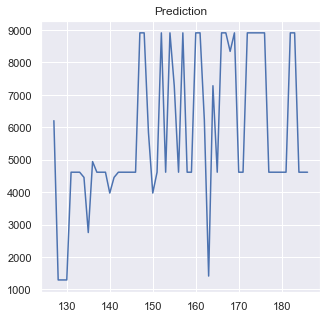

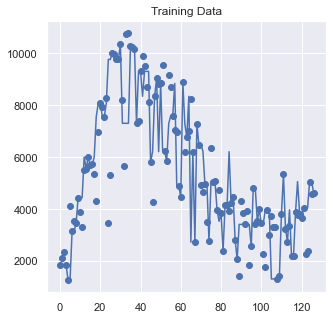

In [10]:
plot_model(tree, useable_X, useable_y, predict_X)

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))
print(forest.score(useable_X, useable_y))

0.9629617974303654
0.5979694018664516
0.7599833420994799


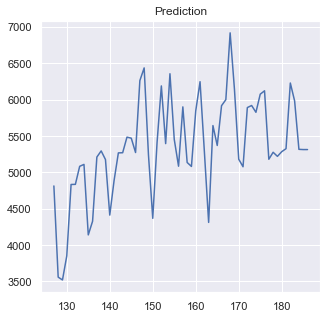

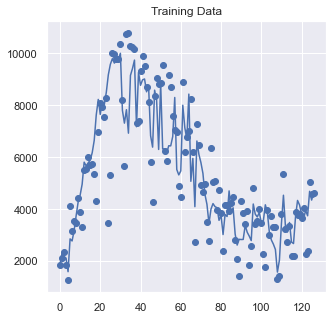

In [14]:
plot_model(forest, useable_X, useable_y, predict_X)

In [15]:
from sklearn.svm import SVR

In [16]:
svr = SVR(kernel='sigmoid')
svr.fit(X_train, y_train)

SVR(kernel='sigmoid')

In [17]:
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))
print(svr.score(useable_X, useable_y))

-0.0704285763030077
-0.2657070601748641
-0.11095875909420316


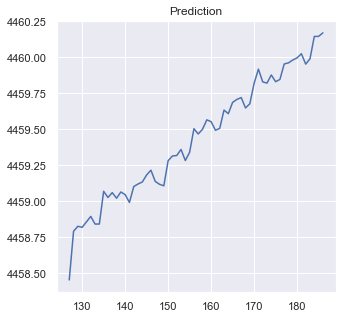

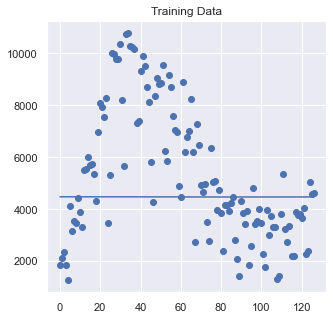

In [18]:
plot_model(svr, useable_X, useable_y, predict_X)

In [19]:
from sklearn.linear_model import SGDRegressor

In [20]:
grad = SGDRegressor( max_iter=8000)
grad.fit(X_train, y_train)

SGDRegressor(max_iter=8000)

In [21]:
print(grad.score(X_train, y_train))
print(grad.score(X_test, y_test))
print(grad.score(useable_X, useable_y))

-4.822674544985605e+28
-2.981823618223945e+28
-4.16515516051673e+28


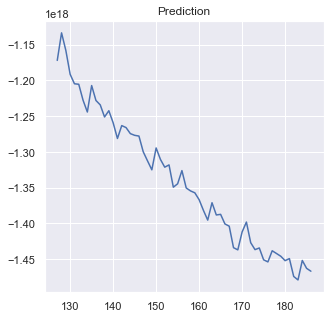

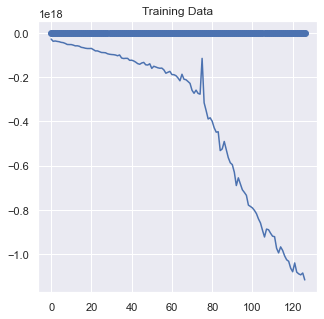

In [22]:
plot_model(grad, useable_X, useable_y, predict_X)

In [23]:
from sklearn.neural_network import MLPRegressor

In [47]:
percept = MLPRegressor(activation="relu", max_iter=100000000, solver="lbfgs")
percept.fit(X_train, y_train)

MLPRegressor(max_iter=1000000000, solver='lbfgs')

In [48]:
print(percept.score(X_train, y_train))
print(percept.score(X_test, y_test))
print(percept.score(useable_X, useable_y))

0.6444288825945497
0.4965843816639296
-2.574716775496554


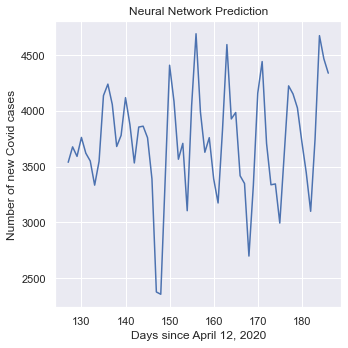

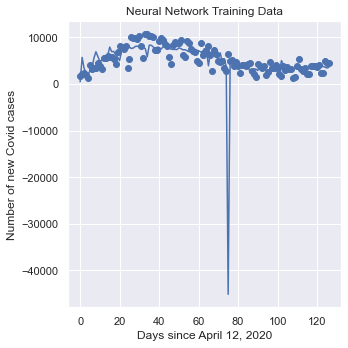

In [104]:
plot_model(percept, useable_X, useable_y, predict_X)

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

In [86]:
boosted = GradientBoostingRegressor()
boosted.fit(X_train, y_train)

GradientBoostingRegressor()

In [87]:
print(boosted.score(X_train, y_train))
print(boosted.score(X_test, y_test))
print(boosted.score(useable_X, useable_y))

0.9986947976627932
0.5358600681667931
0.7441530532397744


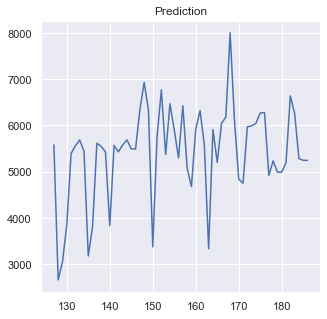

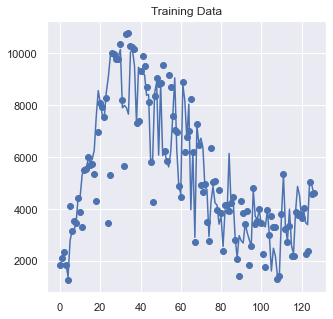

In [89]:
plot_model(boosted, useable_X, useable_y, predict_X)

In [90]:
from sklearn.ensemble import BaggingRegressor

In [98]:
bag = BaggingRegressor(warm_start=True)
bag.fit(X_train, y_train)

BaggingRegressor(warm_start=True)

In [99]:
print(bag.score(X_train, y_train))
print(bag.score(X_test, y_test))
print(bag.score(useable_X, useable_y))

0.9454802971558596
0.6140099487721241
0.7676273460111124


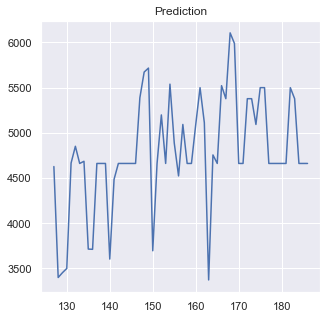

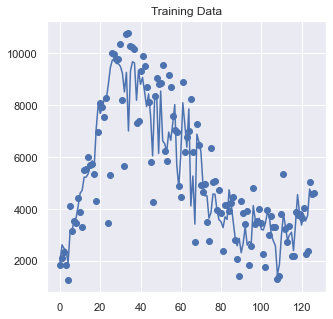

In [100]:
plot_model(bag, useable_X, useable_y, predict_X)